## k-lähimmän naapurin (k-Nearest Neighbor, KNN) regressioanalyysi

In [1]:
import pandas as pd
file_path1 = r"C:\Lataukset\used_cars\knn_preprocessed.csv"
knn_df = pd.read_csv(file_path1)


### Valitaan datasetin koko varsinaista mallia varten

In [2]:
#otetaan pienempi setti testien ajaksi
knn_df = knn_df.sample(n=200000, random_state=42)
len(knn_df)

200000

### Valitaan datasetin koko learning curven tarkastelua varten

In [3]:
#otetaan pienempi setti testien ajaksi
lcurve_knn_df = knn_df.sample(n=20000, random_state=42)
len(lcurve_knn_df)

20000

In [4]:
lcurve_X = lcurve_knn_df.drop(columns=['price'])
lcurve_y = lcurve_knn_df['price']

X = knn_df.drop(columns=['price'])
y = knn_df['price']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

### Muuttujat
- **Lähimpien naapureiden lukumäärä (k)**: Määrittää, kuinka monta naapuria otetaan huomioon ennustettaessa.
- **Etäisyysmitta**: Määrittää, miten etäisyys datapisteiden välillä lasketaan (esim. Euklidinen, Manhattan).
- **Painotus**: Naapureiden vaikutus voidaan määrittää joko tasaisena (`weights='uniform'`) tai etäisyyden mukaan (`weights='distance'`).

1. testattu n_neighbors, 10 antaa parhaan tuloksen, mutta tämän jälkeen muiden parametrien muuttaminen muuttaa mallin ylimukautuvaksi (overfitting)
2. testattu weights='distance' ja  metric='manhattan', ne antavat 0,006-0,06 paremman R^2 arvon kuin default weights='uniform'
3. todettu, että sehän on tuo witghts='distance' mikä vetää overfittingit päälle, joten jätetään se pois

In [6]:
#Learning curven piirtämistä varten
lcurve_X_train, lcurve_X_test, lcurve_y_train, lcurve_y_test = train_test_split(lcurve_X, lcurve_y, test_size=0.2, random_state=42)

#varsinainen malli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan')

### Tarkastellaan oppimiskäyrää, jotta vältetään overfitting ja underfitting

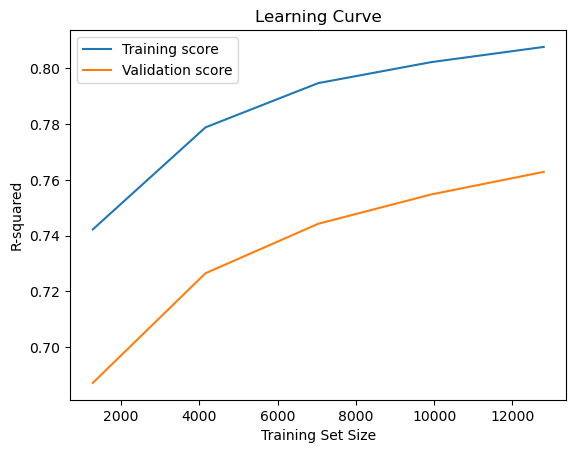

In [7]:
#Learning curve
train_sizes, train_scores, val_scores = learning_curve(knn, lcurve_X_train, lcurve_y_train, cv=5, scoring='r2')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend()
plt.title('Learning Curve')
plt.show()

### Mallin koulutus, ennustus ja tulokset

In [8]:
# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred2 = knn.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r22}")

Mean Squared Error: 25843082.250022534
R-squared: 0.8301709212664615


### Jäännösten tarkastelu

In [9]:
residuals = y_test - y_pred2
print(residuals.describe())

count    40000.000000
mean       402.036227
std       5067.750110
min     -25140.200000
25%      -2382.525000
50%       -109.600000
75%       2432.875000
max      38508.200000
Name: price, dtype: float64


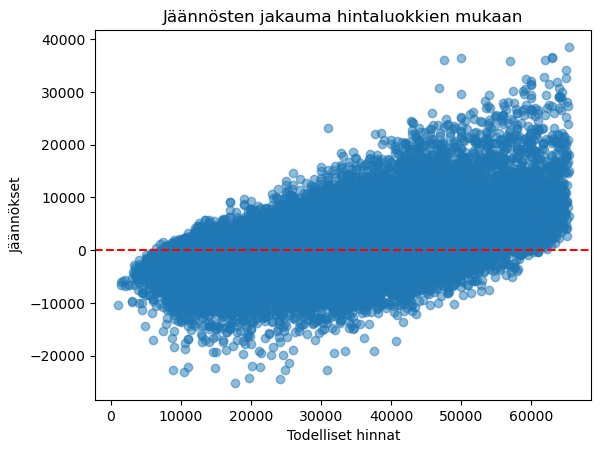

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Todelliset hinnat')
plt.ylabel('Jäännökset')
plt.title('Jäännösten jakauma hintaluokkien mukaan')
plt.show()

### Tarkastellaan scatterplotilla ennusteiden ja todellisten arvojen osumia

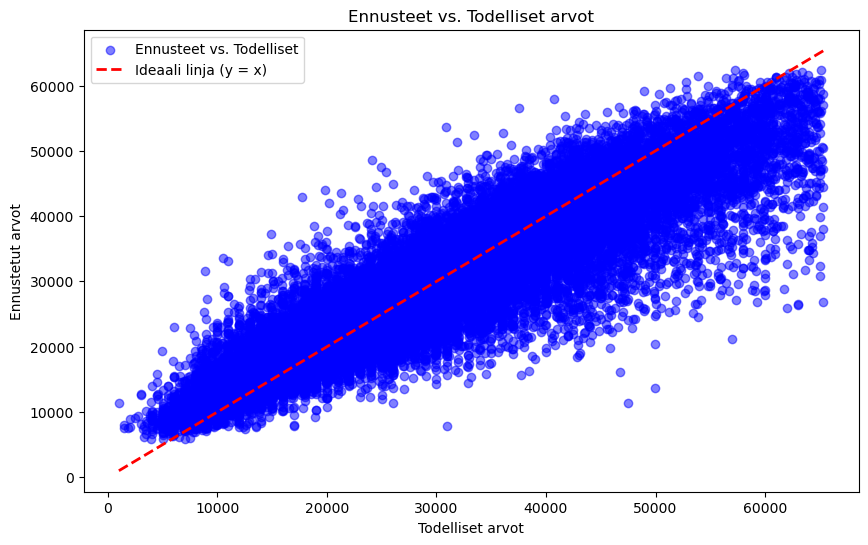

In [11]:
# Ennusteiden vs. todellisten arvojen scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, alpha=0.5, color='blue', label='Ennusteet vs. Todelliset')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideaali linja (y = x)')
 
# Kuvaajan otsikot ja selitteet
plt.xlabel("Todelliset arvot")
plt.ylabel("Ennustetut arvot")
plt.title("Ennusteet vs. Todelliset arvot")
plt.legend()
plt.show()